# Bike Analysis and Demand Prediction for Washington, DC

![Capitol Hill, Washington, DC, USA](images/washington-dc.jpeg)

## EDA

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bikes = pd.read_csv('data/dc-bikes-daily.csv', parse_dates=["date"])
weather = pd.read_csv('data/weather_dc_historic.csv', parse_dates=["DATE"])

In [6]:
weather.columns = weather.columns.str.lower()

In [7]:
weather.head(2)

,station,name,latitude,longitude,elevation,date,awnd,awnd_attributes,prcp,prcp_attributes,snow,snow_attributes,snwd,snwd_attributes,tavg,tavg_attributes,tmax,tmax_attributes,tmin,tmin_attributes
0,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",38.84721,-77.03454,4.1,2011-01-01,3.2,",,W",0.3,",,X,2400",0.0,",,X,",0.0,",,X,",NaN,NaN,14.4,",,X",1.1,",,X"
1,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",38.84721,-77.03454,4.1,2011-01-02,4.9,",,W",1.5,",,X,2400",0.0,",,X,",0.0,",,X,",NaN,NaN,15.0,",,X",1.1,",,X"


In [9]:
bikes.head(2)

,Unnamed: 0,date,numbikes,year,month,dayofweek
0,2412,2011-01-01,959,2011,1,5
1,2413,2011-01-02,781,2011,1,6


In [25]:
bikes.columns

Index(['Unnamed: 0', 'date', 'numbikes', 'year', 'month', 'dayofweek'], dtype='object')

In [26]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3287 non-null   int64         
 1   date        3287 non-null   datetime64[ns]
 2   numbikes    3287 non-null   int64         
 3   year        3287 non-null   int64         
 4   month       3287 non-null   int64         
 5   dayofweek   3287 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 154.2 KB


In [27]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          3288 non-null   object        
 1   NAME             3288 non-null   object        
 2   LATITUDE         3288 non-null   float64       
 3   LONGITUDE        3288 non-null   float64       
 4   ELEVATION        3288 non-null   float64       
 5   DATE             3288 non-null   datetime64[ns]
 6   AWND             3288 non-null   float64       
 7   AWND_ATTRIBUTES  3288 non-null   object        
 8   PRCP             3288 non-null   float64       
 9   PRCP_ATTRIBUTES  3288 non-null   object        
 10  SNOW             3288 non-null   float64       
 11  SNOW_ATTRIBUTES  3288 non-null   object        
 12  SNWD             3288 non-null   float64       
 13  SNWD_ATTRIBUTES  3288 non-null   object        
 14  TAVG             2283 non-null   float64

## Visualization

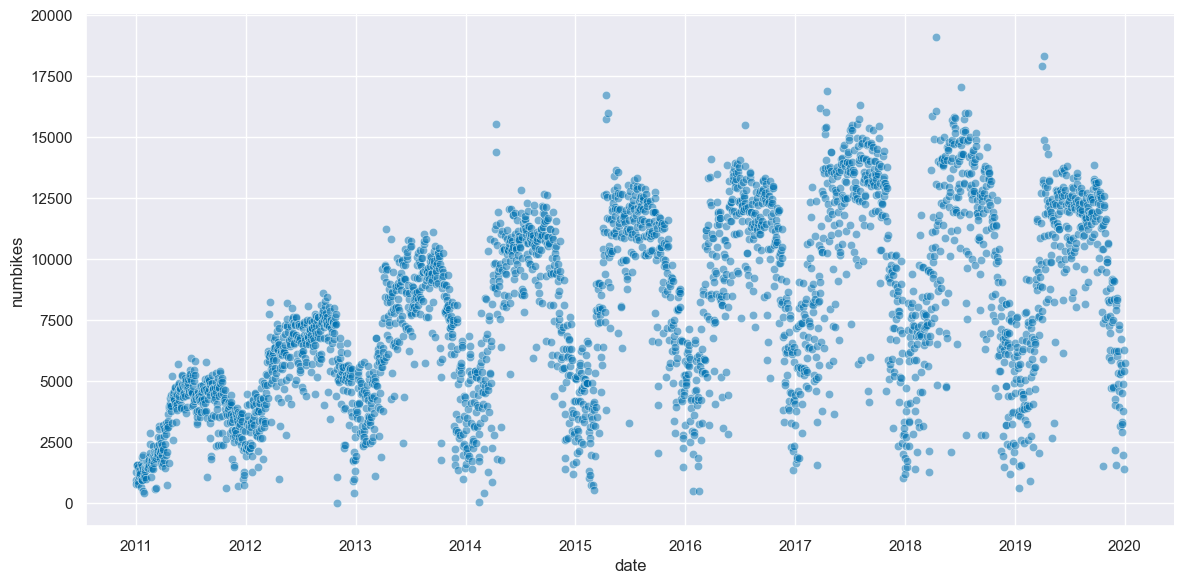

In [28]:
sns.set_theme()
sns.set_palette('colorblind')

# Create a visualization
sns.relplot(
    data=bikes,
    x="date",
    y="numbikes", 
    #hue='year', # since we layer the years on top of each other, we want to add some color by year
    #palette=["C0", "C1", "C2", "k"], # set the color palette
    height=6,
    aspect=2,
    alpha=.5 # add some transparency to the data points, to make the bottom layers more visible 
)

plt.show();

# Data cleaning and feature engineering

In [5]:
coffee_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28 non-null     int64  
 1   Species                28 non-null     object 
 2   Owner                  28 non-null     object 
 3   Country.of.Origin      28 non-null     object 
 4   Farm.Name              25 non-null     object 
 5   Lot.Number             6 non-null      object 
 6   Mill                   20 non-null     object 
 7   ICO.Number             17 non-null     object 
 8   Company                28 non-null     object 
 9   Altitude               25 non-null     object 
 10  Region                 26 non-null     object 
 11  Producer               26 non-null     object 
 12  Number.of.Bags         28 non-null     int64  
 13  Bag.Weight             28 non-null     object 
 14  In.Country.Partner     28 non-null     object 
 15  Harvest.

In [6]:
#for this exercise we will only deal with numeric variables

X = coffee_features.select_dtypes(['number'])

## Splitting data for testing 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [8]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 17 to 6
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number.of.Bags        22 non-null     int64  
 1   Harvest.Year          22 non-null     int64  
 2   Fragrance...Aroma     22 non-null     float64
 3   Flavor                22 non-null     float64
 4   Aftertaste            22 non-null     float64
 5   Salt...Acid           22 non-null     float64
 6   Bitter...Sweet        22 non-null     float64
 7   Mouthfeel             22 non-null     float64
 8   Uniform.Cup           22 non-null     float64
 9   Clean.Cup             22 non-null     float64
 10  Balance               22 non-null     float64
 11  Cupper.Points         22 non-null     float64
 12  Total.Cup.Points      22 non-null     float64
 13  Moisture              22 non-null     float64
 14  Category.One.Defects  22 non-null     int64  
 15  Category.Two.Defects  22 

In [10]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [11]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [12]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [13]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [15]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [17]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [18]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [19]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
